(-5.499999999999998, 5.499999999999963, -5.499999999999998, 5.499999999999963)

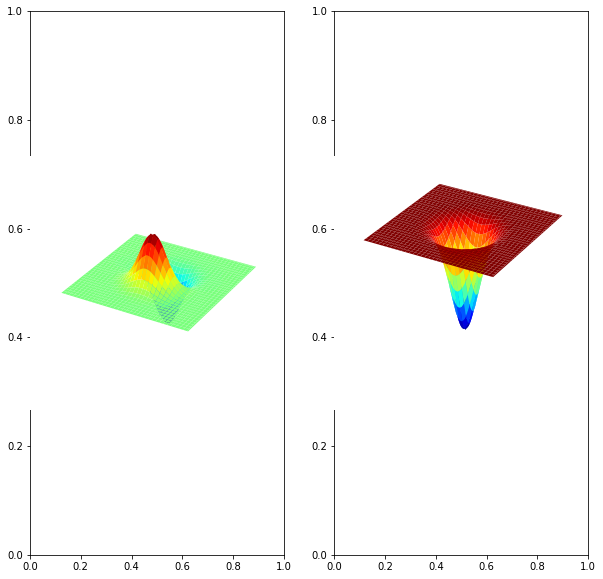

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

delta = 0.1
xx, yy = np.meshgrid(np.arange(-5, 5 + delta, delta), np.arange(-5, 5 + delta, delta))

sigma = 1
g = np.exp(-(xx**2+yy**2)/(2*sigma**2))
g/=np.sum(g)
sobel_v = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]], dtype=np.float32)
g_x = cv.filter2D(g, -1, sobel_v)

sobel_h = np.array([[-1, 0, -1], [-2, 0, -2], [-1, 0, -1]], dtype=np.float32)
g_y = cv.filter2D(g, -1, sobel_h)

surf1 = ax1.plot_surface(xx, yy, g_x, cmap = cm.jet, linewidth=0, antialiased=True)
surf2 = ax2.plot_surface(xx, yy, g_y, cmap = cm.jet, linewidth=0, antialiased=True)

ax1.axis('off')
ax2.axis('off')

Text(0.5, 1.0, 'edges')

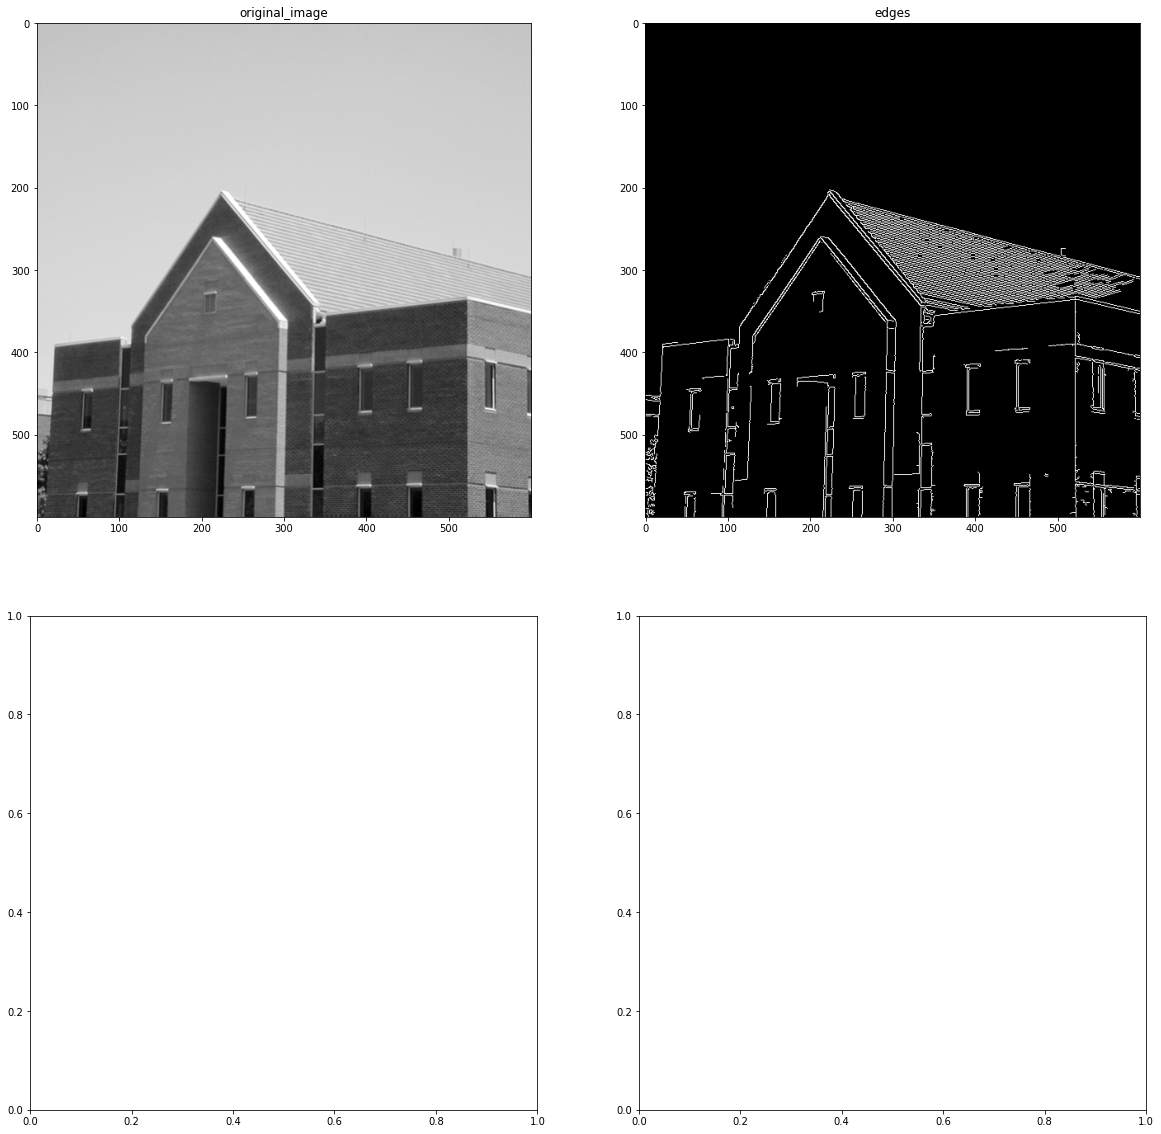

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

im= cv.imread(r"building.tif")
assert im is not None

edges = cv.Canny(im, 100, 200)
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0,0].imshow(im, cmap='gray')
ax[0,0].set_title('original_image')
ax[0,1].imshow(edges, cmap='gray')
ax[0,1].set_title('edges')
